In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm


In [4]:
df = pd.read_csv("50_Startups.csv")


In [5]:
df.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
df_new = df.rename(columns = {'R&D Spend' : 'rdspend', 'Marketing Spend' : 'marketingspend'})


In [7]:
df['State'].unique() # as state contains categorical data get dummy values


array(['New York', 'California', 'Florida'], dtype=object)

In [8]:
df_dc = pd.get_dummies(df_new, columns = ['State'], prefix = '', prefix_sep = '')


In [9]:
df_dc = df_dc.rename(columns = {'New York' : 'Newyork'})


In [10]:
df_dc.describe()


,rdspend,Administration,marketingspend,Profit,California,Florida,Newyork
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200,0.340000,0.320000,0.340000
std,45902.256482,28017.802755,122290.310726,40306.180338,0.478518,0.471212,0.478518
min,0.000000,51283.140000,0.000000,14681.400000,0.000000,0.000000,0.000000
25%,39936.370000,103730.875000,129300.132500,90138.902500,0.000000,0.000000,0.000000
50%,73051.080000,122699.795000,212716.240000,107978.190000,0.000000,0.000000,0.000000
75%,101602.800000,144842.180000,299469.085000,139765.977500,1.000000,1.000000,1.000000
max,165349.200000,182645.560000,471784.100000,192261.830000,1.000000,1.000000,1.000000


In [11]:

df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [12]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022EFF099C40>,
      dtype=object)

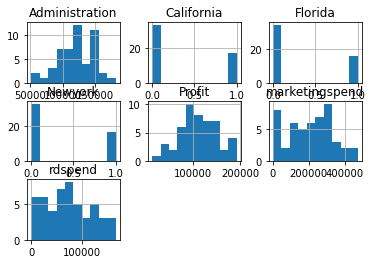

In [13]:
df_dc.hist()

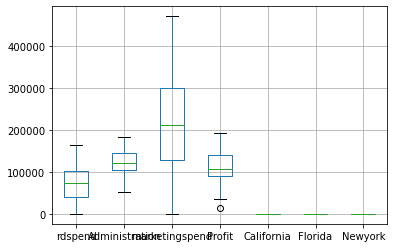

In [14]:
df_dc.boxplot() # checking for outliers as outliers exist in profit we can ignore

In [15]:
df.corr() # checking the relation


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


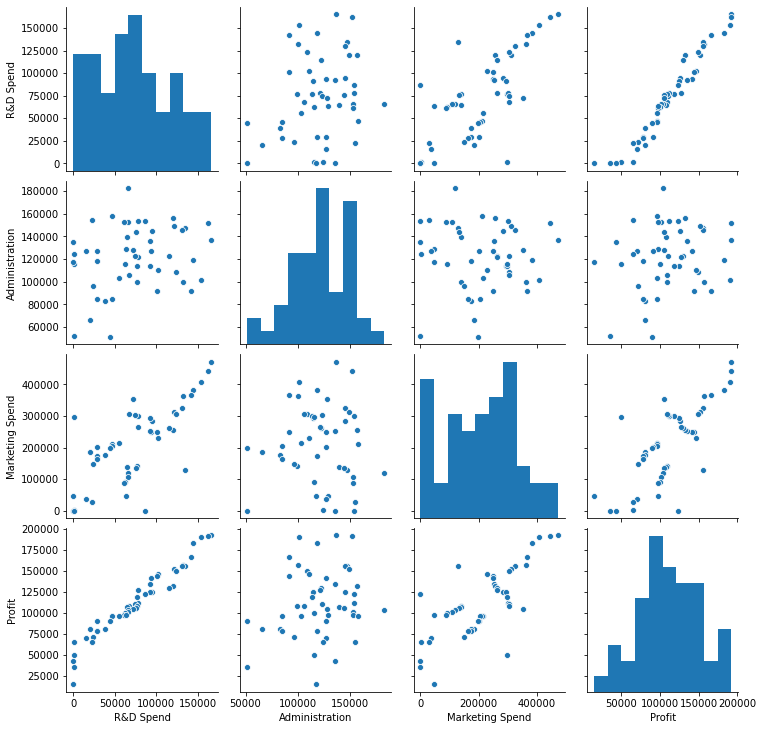

In [17]:
sns.pairplot(df) #check the relevance of all attribute

In [19]:
model1 = smf.ols('Profit~rdspend+Administration+marketingspend+State', data = df_new).fit() # ordinaryu least square method to fit the model


In [20]:
model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Thu, 11 Feb 2021   Prob (F-statistic):           1.34e-27
Time:                        00:28:13   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
State[T.Florida]    198.7888   3371.007      0.059      0.953   -6595.030    6992.607
State[T.New York]   -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
rdspend               0.8060      0.046     17.369      0.000       0.712       0.900
Administration       -0.0270      0.052     -0.517      0.608      -0.132       0.078
marketingspend        0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
model2 = smf.ols('Profit~rdspend', data = df_new).fit()


In [22]:
model2.summary() # R&D spend is significant and adds to the output


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Thu, 11 Feb 2021   Prob (F-statistic):           3.50e-32
Time:                        00:28:58   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
rdspend        0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
model3 = smf.ols('Profit~Administration', data = df_new).fit()


In [24]:
model3.summary()  # p-value > 0.05 therefore it is ot significant


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Thu, 11 Feb 2021   Prob (F-statistic):              0.162
Time:                        00:29:22   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
model4 = smf.ols('Profit~State', data = df_new).fit()


In [26]:
model4.summary()  # Indivisually State has no influence on output as the signifance value is gretare than 0.05


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.5748
Date:                Thu, 11 Feb 2021   Prob (F-statistic):              0.567
Time:                        00:29:41   Log-Likelihood:                -600.05
No. Observations:                  50   AIC:                             1206.
Df Residuals:                      47   BIC:                             1212.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.039e+05   9861.636     10.536      0.000    8.41e+04    1.24e+05
State[T.Florida]   1.487e+04   1.42e+04      1.050      0.299   -1.36e+04    4.34e+04
State[T.New York]  9851.2712   1.39e+04      0.706      0.483   -1.82e+04    3.79e+04
==============================================================================
Omnibus:                        0.111   Durbin-Watson:                   0.081
Prob(Omnibus):                  0.946   Jarque-Bera (JB):                0.207
Skew:                           0.104   Prob(JB):                        0.902
Kurtosis:                       2.762   Cond. No.                         3.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
model5 = smf.ols('Profit~marketingspend', data = df_new).fit()


In [28]:
model5.summary()  # p-value <0.05, therefore it is significant and it adds to the output 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Thu, 11 Feb 2021   Prob (F-statistic):           4.38e-10
Time:                        00:30:11   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept           6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
marketingspend     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
model6 = smf.ols('Profit~marketingspend+State', data = df_new).fit()


In [30]:
model6.summary()  # Even combinely state variable is  not influencing the plot


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     19.71
Date:                Thu, 11 Feb 2021   Prob (F-statistic):           2.32e-08
Time:                        00:34:42   Log-Likelihood:                -579.99
No. Observations:                  50   AIC:                             1168.
Df Residuals:                      46   BIC:                             1176.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.864e+04   8984.018      6.527      0.000    4.06e+04    7.67e+04
State[T.Florida]  -1194.5800   9818.999     -0.122      0.904    -2.1e+04    1.86e+04
State[T.New York]  4196.5465   9467.707      0.443      0.660   -1.49e+04    2.33e+04
marketingspend        0.2480      0.033      7.525      0.000       0.182       0.314
==============================================================================
Omnibus:                        3.720   Durbin-Watson:                   1.174
Prob(Omnibus):                  0.156   Jarque-Bera (JB):                2.973
Skew:                          -0.299   Prob(JB):                        0.226
Kurtosis:                       4.034   Cond. No.                     8.11e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

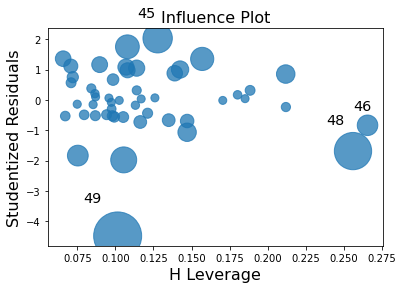

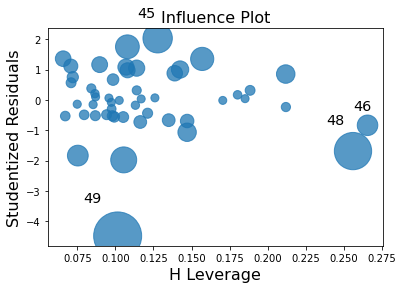

In [31]:
sm.graphics.influence_plot(model1) # Looks like 48, 46, 49 are deviated 


In [32]:
df_new1 = df_new.drop(df_new.index[[46,48,49,45]], axis=0)


In [33]:
df_new1


,rdspend,Administration,marketingspend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [34]:
model_new = smf.ols('Profit~rdspend+Administration+marketingspend+State', data = df_new1).fit()


In [35]:
model_new.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     208.2
Date:                Thu, 11 Feb 2021   Prob (F-statistic):           1.62e-27
Time:                        00:36:02   Log-Likelihood:                -470.78
No. Observations:                  46   AIC:                             953.6
Df Residuals:                      40   BIC:                             964.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.726e+04   5943.741      9.634      0.000    4.52e+04    6.93e+04
State[T.Florida]   -912.4284   2649.323     -0.344      0.732   -6266.910    4442.053
State[T.New York] -1744.9990   2644.430     -0.660      0.513   -7089.591    3599.593
rdspend               0.7730      0.041     18.962      0.000       0.691       0.855
Administration       -0.0520      0.044     -1.184      0.243      -0.141       0.037
marketingspend        0.0283      0.015      1.911      0.063      -0.002       0.058
==============================================================================
Omnibus:                        0.122   Durbin-Watson:                   1.781
Prob(Omnibus):                  0.941   Jarque-Bera (JB):                0.332
Skew:                           0.011   Prob(JB):                        0.847
Kurtosis:                       2.584   Cond. No.                     1.60e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
df_pred = model_new.predict(df_new1[['State','rdspend','Administration','marketingspend']])


In [37]:
df_pred


0     189568.101575
1     187643.132097
2     181248.361452
3     171792.808693
4     171811.771965
5     162538.847299
6     157277.643056
7     158668.382487
8     149781.300151
9     155580.632740
10    135862.224690
11    137376.464133
12    129354.945855
13    128475.375644
14    148183.224300
15    145075.757402
16    118722.882278
17    129138.489181
18    129680.626071
19    114331.341669
20    118736.819271
21    116596.520382
22    115745.748853
23    111677.716301
24    113885.733892
25    103891.627402
26    110873.656972
27    114601.849801
28    101247.886453
29    101299.773232
30    100833.409399
31     97326.534690
32    100857.271461
33     99959.802664
34     90910.788478
35     92478.017582
36     77588.045407
37     94236.837562
38     72966.375792
39     87703.118189
40     78211.201262
41     78157.837130
42     74719.745043
43     61878.648657
44     67150.439075
47     50212.602302
dtype: float64

In [38]:
rsq_admin = smf.ols('Administration~marketingspend+rdspend+State', data = df_new1).fit().rsquared


In [39]:
vif_admin = 1/(1-rsq_admin)


In [40]:
rsq_ms = smf.ols('marketingspend~Administration+rdspend+State', data = df_new1).fit().rsquared


In [41]:
vif_ms = 1/(1-rsq_ms)


In [42]:
rsq_rd = smf.ols('rdspend~marketingspend+Administration+State', data = df_new1).fit().rsquared


In [43]:
vif_rd = 1/(1-rsq_rd)


In [44]:
# VIF (variance inflence factor cannot be calculated for State as State contains dummy values which will get nullified)

In [45]:
VIF = {'Variables' : ['Administration', 'Marketing Spend', 'R&D Spend'], 'VIF_Value' : [vif_admin, vif_ms, vif_rd]}


In [46]:
VIF

{'Variables': ['Administration', 'Marketing Spend', 'R&D Spend'],
 'VIF_Value': [1.2373858776930344, 2.539141249531142, 2.5489151853096605]}

In [47]:
VIF_frame = pd.DataFrame(VIF)


In [48]:
VIF_frame

,Variables,VIF_Value
0,Administration,1.237386
1,Marketing Spend,2.539141
2,R&D Spend,2.548915


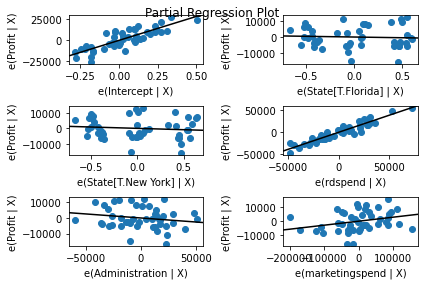

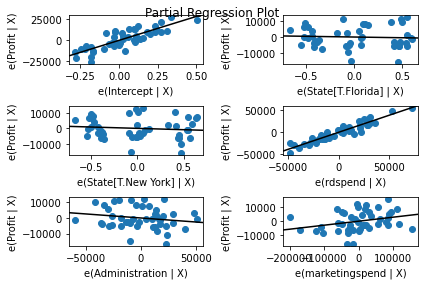

In [49]:
sm.graphics.plot_partregress_grid(model_new)


In [50]:
model7 = smf.ols('Profit~rdspend+Administration+marketingspend', data = df_new1).fit()


In [51]:
model7.summary()  # Still Administration variable has more p-value


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     360.3
Date:                Thu, 11 Feb 2021   Prob (F-statistic):           5.56e-30
Time:                        00:43:39   Log-Likelihood:                -471.03
No. Observations:                  46   AIC:                             950.1
Df Residuals:                      42   BIC:                             957.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        5.69e+04   5788.198      9.830      0.000    4.52e+04    6.86e+04
rdspend            0.7714      0.040     19.320      0.000       0.691       0.852
Administration    -0.0540      0.043     -1.254      0.217      -0.141       0.033
marketingspend     0.0277      0.014      1.916      0.062      -0.001       0.057
==============================================================================
Omnibus:                        0.094   Durbin-Watson:                   1.745
Prob(Omnibus):                  0.954   Jarque-Bera (JB):                0.291
Skew:                          -0.053   Prob(JB):                        0.865
Kurtosis:                       2.625   Cond. No.                     1.59e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
model8 = smf.ols('Profit~rdspend+marketingspend', data = df_new1).fit()


In [53]:
model8.summary()  # Administration has more p-value so it has to be eliminated 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     532.5
Date:                Thu, 11 Feb 2021   Prob (F-statistic):           4.59e-31
Time:                        00:44:15   Log-Likelihood:                -471.88
No. Observations:                  46   AIC:                             949.8
Df Residuals:                      43   BIC:                             955.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.029e+04   2424.629     20.743      0.000    4.54e+04    5.52e+04
rdspend            0.7507      0.037     20.511      0.000       0.677       0.825
marketingspend     0.0350      0.013      2.627      0.012       0.008       0.062
==============================================================================
Omnibus:                        0.061   Durbin-Watson:                   1.523
Prob(Omnibus):                  0.970   Jarque-Bera (JB):                0.161
Skew:                          -0.079   Prob(JB):                        0.923
Kurtosis:                       2.758   Cond. No.                     6.08e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
model9 = smf.ols('Profit~marketingspend', data = df_new1).fit()


In [55]:
model9.summary() # marketing spend indivisaully will contribute for the output


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     61.14
Date:                Thu, 11 Feb 2021   Prob (F-statistic):           7.34e-10
Time:                        00:44:34   Log-Likelihood:                -526.57
No. Observations:                  46   AIC:                             1057.
Df Residuals:                      44   BIC:                             1061.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       6.646e+04   7443.739      8.928      0.000    5.15e+04    8.15e+04
marketingspend     0.2331      0.030      7.819      0.000       0.173       0.293
==============================================================================
Omnibus:                        1.301   Durbin-Watson:                   1.076
Prob(Omnibus):                  0.522   Jarque-Bera (JB):                1.024
Skew:                           0.363   Prob(JB):                        0.599
Kurtosis:                       2.909   Cond. No.                     5.44e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.44e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
from statsmodels.graphics.regressionplots import influence_plot

In [71]:
df_new2 = df_new1.drop(df_new1.index[[36,19,15,14]],axis=0)


In [72]:
df_new2

,rdspend,Administration,marketingspend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [73]:
model10 = smf.ols('Profit~rdspend+marketingspend+Administration', data = df_new2).fit()


In [74]:
model10.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     508.8
Date:                Thu, 11 Feb 2021   Prob (F-statistic):           1.04e-30
Time:                        00:51:46   Log-Likelihood:                -422.49
No. Observations:                  42   AIC:                             853.0
Df Residuals:                      38   BIC:                             859.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.562e+04   4935.535     11.270      0.000    4.56e+04    6.56e+04
rdspend            0.8029      0.037     21.425      0.000       0.727       0.879
marketingspend     0.0242      0.014      1.770      0.085      -0.003       0.052
Administration    -0.0555      0.037     -1.507      0.140      -0.130       0.019
==============================================================================
Omnibus:                        5.258   Durbin-Watson:                   1.583
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                2.658
Skew:                           0.358   Prob(JB):                        0.265
Kurtosis:                       1.997   Cond. No.                     1.56e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

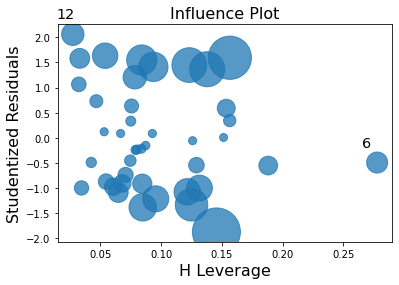

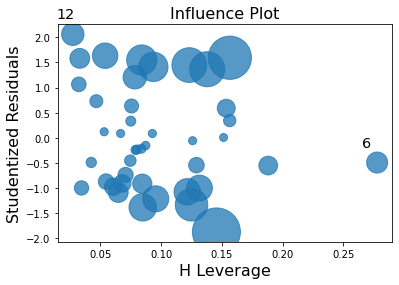

In [75]:
sm.graphics.influence_plot(model10)


In [76]:
model11 = smf.ols('Profit ~ marketingspend + rdspend', data = df_new2).fit()


In [77]:
model11.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     738.1
Date:                Thu, 11 Feb 2021   Prob (F-statistic):           1.02e-31
Time:                        00:52:18   Log-Likelihood:                -423.71
No. Observations:                  42   AIC:                             853.4
Df Residuals:                      39   BIC:                             858.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.889e+04   2127.052     22.983      0.000    4.46e+04    5.32e+04
marketingspend     0.0321      0.013      2.489      0.017       0.006       0.058
rdspend            0.7807      0.035     22.306      0.000       0.710       0.851
==============================================================================
Omnibus:                        2.896   Durbin-Watson:                   1.348
Prob(Omnibus):                  0.235   Jarque-Bera (JB):                2.191
Skew:                           0.403   Prob(JB):                        0.334
Kurtosis:                       2.223   Cond. No.                     6.10e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [78]:
df_new3 = df_new2.drop(df_new2.index[[41]])


In [79]:
df_new3 = df_new2.drop(df_new2.index[[41]])


In [80]:
model12 = smf.ols('Profit ~ marketingspend + rdspend + np.log(Administration)', data = df_new3).fit()


In [81]:
model13 = smf.ols('Profit ~ np.log(marketingspend) + rdspend', data = df_new3).fit()
